In [4]:
import pandas as pd
import matplotlib.pyplot as plt

avocados = pd.read_pickle("avocados.pkl")
avocados.describe()

,year,avg_price,nb_sold
count,1014.000000,1014.000000,1.014000e+03
mean,2016.147929,1.319024,4.167774e+06
std,0.940380,0.295168,5.596185e+06
min,2015.000000,0.760000,8.343000e+02
25%,2015.000000,1.040000,1.320755e+05
50%,2016.000000,1.325000,4.232327e+05
75%,2017.000000,1.540000,1.019066e+07
max,2018.000000,2.090000,2.274362e+07


In [5]:
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [6]:
avocados["size"].unique()

array(['small', 'large', 'extra_large'], dtype=object)

In [7]:
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()
nb_sold_by_size

size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64

## Which avocado size is most popular ?
Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables

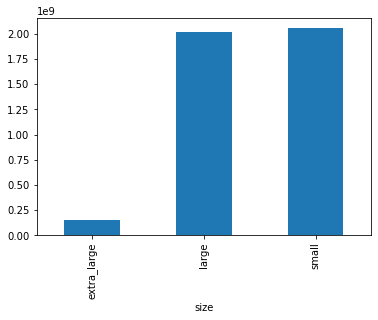

In [8]:
nb_sold_by_size.plot(kind="bar")
plt.show()

## Avocado supply and demand

Scatter plots are ideal for visualizing relationships between numerical variables. 
In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. 
If they're related, you may be able to use one number to predict the other.

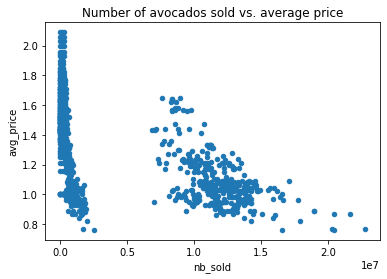

In [9]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x="nb_sold", y="avg_price", title="Number of avocados sold vs. average price", kind="scatter")
plt.show()

## Price of conventional vs. organic avocados

Creating multiple plots for different subsets of data allows you to compare groups. 

In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.

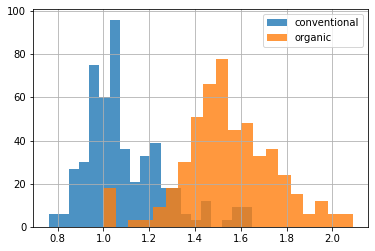

In [10]:
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.8, bins=20)
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.8, bins=20)
plt.legend(["conventional", "organic"])
plt.show()

# Missing values
Missing values are everywhere, and you don't want them interfering with your work. 
Some functions ignore missing data by default, but that's not always the behavior you might want. 
Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. 
If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis.

## Findig Missing values

In [23]:
temperatures = pd.read_csv("temperatures_1.csv")
temperatures

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


In [24]:
temperatures.isna()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239172,False,False,False,False,False,False,False
239173,False,False,False,False,False,False,False
239174,False,False,False,False,False,False,False
239175,False,False,False,False,False,False,False


In [26]:
temperatures.isna().any()
# we can not know how much missing value we have

dt                               False
AverageTemperature                True
AverageTemperatureUncertainty     True
City                             False
Country                          False
Latitude                         False
Longitude                        False
dtype: bool

In [28]:
temperatures.isna().sum()
# we can see the exact number of missing values

dt                                   0
AverageTemperature               11002
AverageTemperatureUncertainty    11002
City                                 0
Country                              0
Latitude                             0
Longitude                            0
dtype: int64

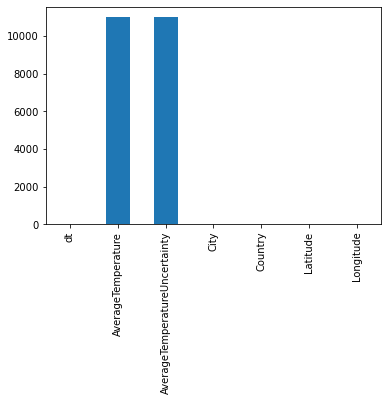

In [30]:
temperatures.isna().sum().plot(kind="bar")
plt.show()

#### Removing missing values ( Solution 1, but not recommanded if we have a lot of row(observations) like hire)

In [35]:
temperatures_drop_na = temperatures.dropna()
temperatures_drop_na.isna().any()

dt                               False
AverageTemperature               False
AverageTemperatureUncertainty    False
City                             False
Country                          False
Latitude                         False
Longitude                        False
dtype: bool

#### Replacing missing values ( solution 2, but we have to be careful, replacing missing value can affect distribution)

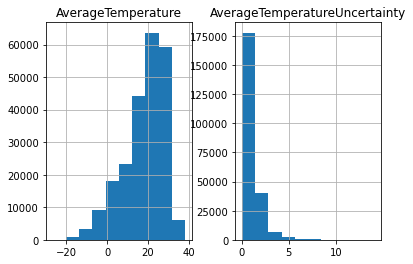

In [41]:
# visualize the distribution before and after replacing missing values
missing_cols = ["AverageTemperature", "AverageTemperatureUncertainty"]
temperatures[missing_cols].hist()
plt.show()

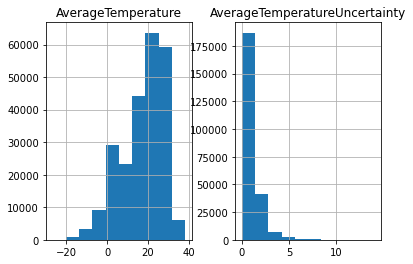

In [42]:
# now we fill the missing value with the 0 and we visualize the distribution
temperatures_filled = temperatures.fillna(0)
temperatures_filled[missing_cols].hist()
plt.show()